In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

from braket.circuits import Circuit
from braket.circuits import Gate
from braket.devices import LocalSimulator
import string
from math import pi

# print all available gates in Amazon Braket
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print(gate_set)



['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'H', 'I', 'ISwap', 'PSwap', 'PhaseShift', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


# <Q|1> The Stern-Gerlach Experiments

## Introduction
##### The following experiment was first conceived by Otto Stern in 1921 and thereafter carried out by Walther Gerlach in 1922. The original experiment used a beam of silver atoms traveling through magnetic fields and screens to show that angular momentum is quantized. This notebook will allow you to use real a real quantum computer to manipulate qubits and carry out the Stern-Gerlach experiment.

## Basic Properties of Qubit Operations and Measurements (Local)
##### We first walk through some simple qubit preparations and measurements to get a feel for how everything functions.

In [55]:
# Let's try to prepare a single qubit in the 'down' |0> state.
# When we initialize a qubit with the code below, it defaults to starting in the 'down' |0> state.
# After the qubit is initialized, we apply a dummy rotation that doesn't actually do anything. 
# The qubit is still in whatever state it started in.
psi = Circuit().ry(angle=0, target=0)

# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
##TODO: insert Bloch sphere visualization of state here


Counter({'0': 1000})


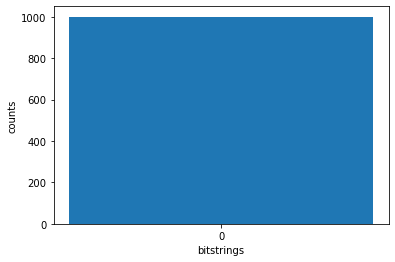

In [56]:
# We want to measure this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'down' then \ψ> = \0> and the only possibility of measurement should be \0>.

# set up device to run a simulation on your classical computer
device = LocalSimulator()

# run circuit many times and record the measurement of each shot
result = device.run(psi, shots=1000).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [57]:
# As we expected, every run and measurement of the circuit produced the same result of 'down'.
# Let's now rotate the initial 'down' state by pi radians about the y-axis. This should result in an 'up' state.
psi = Circuit().ry(angle=pi, target=0)

# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
##TODO: insert Bloch sphere visualization of state here

Counter({'1': 1000})


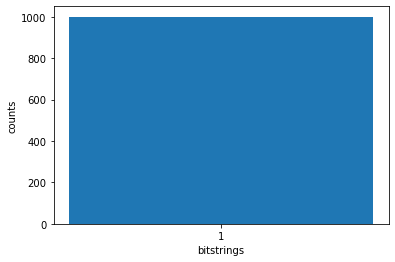

In [58]:
# We want to measure this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'up' then \ψ> = \1> and the only possibility of measurement should be \1>.

# set up device to run a simulation on your classical computer
device = LocalSimulator()

# run circuit many times and record the measurement of each shot
result = device.run(psi, shots=1000).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [59]:
# Again, just as we expected, every run and measurement of the circuit produced the same result of 'up'.
# Let's do something a little different now. Instead of rotating fully from 'down' to 'up', let's only rotate halfway using a y-rotation by pi/2 radians
psi = Circuit().ry(angle=pi/2, target=0)

# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
##TODO: insert Bloch sphere visualization of state here

Counter({'1': 521, '0': 479})


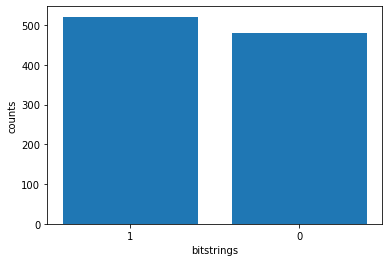

In [60]:
# We want to measure this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'up' then \ψ> = \1> and the only possibility of measurement should be \1>.

# set up device to run a simulation on your classical computer
device = LocalSimulator()

# run circuit many times and record the measurement of each shot
result = device.run(psi, shots=1000).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [61]:
# We see that roughly half of the measurements were 'down' and the other half were 'up'.
# This is because we prepared the state as \ψ>=1/(2)^(1/2) |0> - 1/(2)^(1/2) |1>.
# We could have accomplished the same measurement outcome using what's called the Hadamard operator.
psi = Circuit().h(range(1))

# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
##TODO: insert Bloch sphere visualization of state here

# Note that while the state is still 'halfway' between \0> and \1>, it is rotated compared to the y-rotation.

Counter({'0': 506, '1': 494})


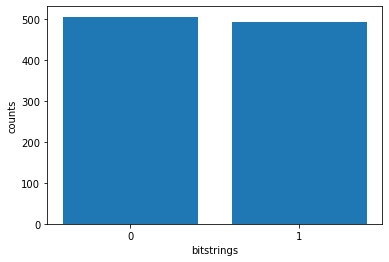

In [62]:
# We want to measure this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'up' then \ψ> = \1> and the only possibility of measurement should be \1>.

# set up device to run a simulation on your classical computer
device = LocalSimulator()

# run circuit many times and record the measurement of each shot
result = device.run(psi, shots=1000).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Indeed, we see the end result is the same as the one we saw for a y-rotated state.

## Representing a beam of silver atoms with real qubits - in progress

##### To mimic the experiment, we must first replace the beam of silver atoms by qubits. In the original experiment, silver was used because all electron valences are filled except for the outermost 5s shell, where outermost shell has only a single electron. Electrons are particles that have fundamental angular momentum which can be measured as 'up' +1/2 or 'down' -1/2. Though the measurement can only yield either of these results, the pre-measurement state is described by any superposition of 'up' and 'down'. A qubit is a quantum object which also can be measured as either spin 'up' or spin 'down' and so the spin structure of an electron is identical to that of a qubit. Here, we describe how to initialize a qubit in an arbitrary spin state mimicking the arbitrary spin state of the electrons exiting the oven in the Stern-Gerlach experiment.

In [26]:
ϕ = pi/2
θ = pi/3
silver_atom = Circuit().ry(angle=ϕ,target=0).rz(angle=θ,target=0)

Counter({'0': 10})


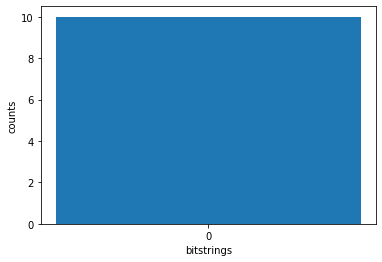

In [36]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(down, shots=10).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');
